In [96]:
# imports
import pandas as pd
from path import Path
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [97]:
np.random.seed(21)

In [98]:
path_to_processed_data = Path.joinpath("..",
    "data", "processed"
)

In [99]:
df_coords = pd.read_csv(Path.joinpath(path_to_processed_data, "coords.csv"))
df_coords

,cat,x,y
0,0,2026,6027
1,1,3025,6023
2,2,1518,5518
3,3,2516,5514
4,4,3530,5511
...,...,...,...
110,110,5506,998
111,111,2029,509
112,112,2996,514
113,113,4996,514


In [100]:
well_df = pd.read_csv(Path.joinpath(path_to_processed_data, "well_data.csv"))
well_df

,cat,date,oil,liquid,fp,bhp,group,water,watercut,water_inj
0,0,1987-03-09,47.923,49.001,170.0,57.0,P,1.078,0.022000,NaN
1,0,1987-03-10,34.027,34.792,170.0,57.0,P,0.765,0.021988,NaN
2,0,1987-03-11,44.988,46.000,170.0,66.0,P,1.012,0.022000,NaN
3,0,1987-03-12,44.988,46.000,170.0,63.0,P,1.012,0.022000,NaN
4,0,1987-03-13,44.988,46.000,170.0,61.0,P,1.012,0.022000,NaN
...,...,...,...,...,...,...,...,...,...,...
118415,66,1997-07-01,NaN,NaN,235.0,NaN,I,NaN,NaN,165.728090
118416,66,1997-07-02,NaN,NaN,235.0,NaN,I,NaN,NaN,161.296730
118417,66,1997-07-03,NaN,NaN,235.0,NaN,I,NaN,NaN,163.681567
118418,66,1997-07-04,NaN,NaN,235.0,NaN,I,NaN,NaN,161.297233


In [101]:
injectors = well_df.loc[well_df['group']=='I']
producers = well_df.loc[well_df['group']=='P']

<h2>TLCC </h2>

Первый способ определения связанных скважин - кросс-корреляция с временным лагом.

In [102]:
# def synchronize(datax, datay):
    

In [103]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [104]:
injectors[injectors['cat']==0]

,cat,date,oil,liquid,fp,bhp,group,water,watercut,water_inj
24661,0,1991-10-07,NaN,NaN,232.3,NaN,I,NaN,NaN,7.777000
24662,0,1991-10-08,NaN,NaN,232.3,NaN,I,NaN,NaN,20.001000
24663,0,1991-10-09,NaN,NaN,232.3,NaN,I,NaN,NaN,28.983000
24664,0,1991-10-10,NaN,NaN,232.3,NaN,I,NaN,NaN,66.282000
24665,0,1991-10-11,NaN,NaN,232.3,NaN,I,NaN,NaN,69.508000
...,...,...,...,...,...,...,...,...,...,...
26755,0,1997-07-01,NaN,NaN,252.0,NaN,I,NaN,NaN,129.217617
26756,0,1997-07-02,NaN,NaN,252.0,NaN,I,NaN,NaN,124.813669
26757,0,1997-07-03,NaN,NaN,252.0,NaN,I,NaN,NaN,127.410748
26758,0,1997-07-04,NaN,NaN,252.0,NaN,I,NaN,NaN,126.000747


In [105]:
older = producers[producers['date'] > injectors[injectors['cat']==0]['date'].min()]['cat'].unique()

Будем рассматривать влияние за последние два месяца

In [106]:
d1 = injectors[injectors['cat']==0]
d2 = producers[producers['cat']==64]

In [107]:
print(f'{d1.date.min()} {d1.date.max()}')
print(f'{d2.date.min()} {d2.date.max()}')

1991-10-07 1997-07-05
1991-03-04 1991-11-29


In [108]:
df_coords[df_coords['cat'].isin(older)]

,cat,x,y
55,55,746,1318
56,56,1496,514
63,63,1614,4867
64,64,2018,5518
68,68,3521,5033
69,69,676,4614
70,70,2014,4528
71,71,3012,4524
72,72,4011,4520
73,73,1520,4019


In [109]:
np.array(range(0, 90))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

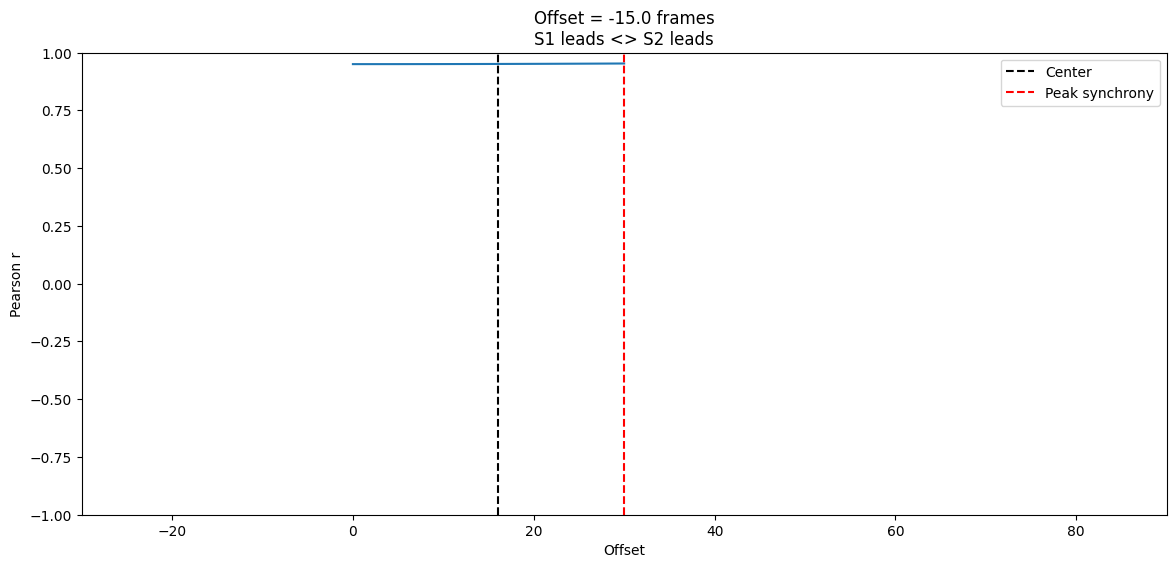

In [110]:
# d2 = injectors[injectors['cat']==0].watercut
# d1 = producers[producers['cat']==64].water_inj
x = np.array(range(0, 90))
val1 = np.sin(x/90)
val2 = -2*np.cos(x/90)
d1 = pd.Series(val1)
d2 = pd.Series(val2)
days = 30
rs = [crosscorr(d2,d1, lag) for lag in range(-days,1)]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,6))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-1,1],xlim=[-30,90], xlabel='Offset',ylabel='Pearson r')
#ax.set_xticks([-60, -50, -40, -30, -20, -10, 0]*(-1));
plt.legend()

In [111]:
rs

[0.9506267031915691,
 0.9506257938854806,
 0.9506315601916508,
 0.950643975528743,
 0.9506630121033562,
 0.9506886410124462,
 0.9507208323352923,
 0.9507595552160737,
 0.9508047779379751,
 0.9508564679896525,
 0.9509145921247949,
 0.9509791164154303,
 0.9510500062995565,
 0.9511272266236265,
 0.9512107416803378,
 0.9513005152421597,
 0.9513965105909526,
 0.9514986905440317,
 0.9516070174769669,
 0.9517214533433849,
 0.9518419596920382,
 0.9519684976813355,
 0.9521010280915475,
 0.9522395113348724,
 0.9523839074635067,
 0.9525341761758831,
 0.9526902768212041,
 0.9528521684023905,
 0.9530198095775535,
 0.9531931586601005,
 0.9533721736175456]

In [112]:
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45, np.nan],
                   "Col2": [13, 23, 18, 33, 48, 60],
                   "Col3": [17, 27, 22, 37, 52, np.nan]},
                   index=pd.date_range("2020-01-01", "2020-01-06"))

In [113]:
d1 = pd.Series([10, 20, 15, 30, 45])
d2 = pd.Series([13, 23, 18, 33, 48, 60])
d1.corr(d2.shift(1))

0.7008255578851517

In [114]:
col1 = df.Col1
col2 = df.Col2
col1.corr(col2.shift(0))

1.0

In [115]:
col1.shift(3)

2020-01-01     NaN
2020-01-02     NaN
2020-01-03     NaN
2020-01-04    10.0
2020-01-05    20.0
2020-01-06    15.0
Freq: D, Name: Col1, dtype: float64